<a href="https://colab.research.google.com/github/Kent7474/Proyecto_Seminario/blob/v1/An%C3%A1lisis_de_activos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DE LIBRERÍAS

In [1]:
# Frameworks principales
import pandas as pd
import numpy as np

# from pandas_datareader import data as pdr #No está funcionando
import yfinance as yf

# Frameworks secundarios
from datetime import datetime
    # Visualización
import matplotlib.pyplot as plt
import statistics
import seaborn as sns


# DEFINICIÓN DE ACTIVOS Y FECHAS

## Periodos - Fecha inicio y fin

In [2]:
 #  YYYY-mm-dd
fechaInicio = "2017-01-01"
#today = "2022-11-01"
today = datetime.today().strftime('%Y-%m-%d')

In [3]:
#activos = ["AAPL", "MSFT", "AMZN", "GOOGL", "ENPH", "META", "PEP", "TSLA", "V", "CAR", "TTD", "AMGN", "AAL", "TMUS", "CPRX", "ICPT"]
#activos = ["AAPL", "MSFT", "AMZN", "GOOGL", "META", "TSLA", "V"]
#activos = ["RIOT", "WKHS", "SPCE", "OSTK", "TSLA", "PLUG", "ZM", "QS", "BYND", "XPEV"]
#activos = ["RIOT", "WKHS", "SPCE", "OSTK", "TSLA", "PLUG", "ZM", "QS", "BYND", "XPEV", "AAPL", "MSFT", "AMZN", "GOOGL", "FB", "JNJ", "V", "DIS", "PFE", "KO"]

''' NASDAQ, más rendimiento a mayor riesgo'''
#activos = ["AMD","LCID", "MNST", "BIIB", "NVDA", "ADBE", "NFLX", "INTC"]

#activos = ["AMD","LCID", "MNST", "BIIB", "NVDA", "ADBE", "NFLX", "INTC", "HON","GFS", "FISV", "FAST", "EXC", "CSX", "CRWD", "COST", "MELI", "META", "MRVL", "MAR", "LULU", "HON", "GFS" ]
activos = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'JNJ', 'PG', 'V', 'JPM', 'KO', 'PEP', 'XOM', 'CVX', 'T', 'VZ', 'INTC', 'CSCO', 'ADBE', 'CRM', 'ABT', 'AMGN', 'UNH', 'PFE', 'MRK', 'BMY', 'RTX', 'LMT', 'GS', 'MA']


''' Excel facu '''
#activos = ['FNKO', 'PEP', 'MCD', 'SONY', 'DIS', 'CMCSA', 'NTDOY', 'CCOEY', 'MDLZ', 'GME']

'''Excel práctica en clase '''
#activos = ['TSLA', 'META', 'AAPL', 'AMZN', 'NFLX']

len(activos)

29

# DESCARGA Y VISUALIZACIÓN DE RENDIMIENTOS.
(Columna 'Adj Close') desde Yahoo Finance.

In [4]:
''' Con la función yf.download descargamos los rendimientos de cada activo
    según las fechas dadas (fechaInicio y today). De todas las columnas que
    nos trae, nos quedamos con 'Adj Close' '''
dataSet = yf.download(activos, start=fechaInicio, end=today)['Adj Close']
#dataSet = yf.download(activos, start=fechaInicio, end=today, interval='1mo')['Adj Close']

''' Revisamos los primero y los últimos 3 registros del DataFrame,
     para asegurarnos que tenga datos.'''
display(dataSet)
pd.DataFrame(dataSet).to_excel("DataSet.xlsx")
#display(dataSet.head(3))
#display(dataSet.tail(3))

[*********************100%***********************]  29 of 29 completed


,AAPL,ABT,ADBE,AMGN,AMZN,BMY,CRM,CSCO,CVX,GOOGL,...,MSFT,PEP,PFE,PG,RTX,T,UNH,V,VZ,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,27.095846,34.819313,103.480003,124.208275,37.683498,48.898582,70.540001,24.954926,89.356476,40.400501,...,57.375916,86.792381,24.618328,70.369568,59.738838,19.597082,146.696655,76.093681,40.122684,66.233269
2017-01-04,27.065527,35.095730,104.139999,125.971718,37.859001,48.964817,72.800003,24.806580,89.333733,40.388500,...,57.119202,86.958244,24.834673,70.620308,59.776585,19.483194,147.114609,76.715858,40.078583,65.504547
2017-01-05,27.203157,35.398884,105.910004,126.062340,39.022499,49.784481,72.790001,24.864269,88.947044,40.651001,...,57.119202,86.842140,25.073397,71.088303,60.019131,19.428532,147.359894,77.615570,40.166790,64.528069
2017-01-06,27.506428,36.361885,108.300003,129.193710,39.799500,49.635452,73.800003,24.913712,88.590691,41.260502,...,57.614300,86.717743,24.976414,71.063240,60.665966,19.113411,147.568939,78.687576,39.570923,64.491638
2017-01-09,27.758373,36.326210,108.570000,130.891251,39.846001,49.453304,73.959999,24.872511,87.832458,41.359001,...,57.430923,85.805458,24.968958,70.536736,60.099991,18.872875,147.150955,78.247284,39.140003,63.427692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-12,183.789993,101.400002,474.630005,217.360001,126.570000,64.760002,213.690002,50.480000,157.330002,123.639999,...,331.850006,181.899994,39.900002,145.410004,99.419998,15.930000,490.576172,226.169998,35.610001,106.419998
2023-06-13,183.309998,101.860001,478.989990,221.990005,126.660004,64.760002,208.979996,50.799999,158.509995,123.830002,...,334.290009,181.539993,40.279999,145.059998,99.690002,15.820000,489.301422,223.399994,35.480000,106.440002
2023-06-14,183.949997,103.250000,479.529999,222.279999,126.419998,64.160004,209.399994,50.959999,157.089996,123.669998,...,337.339996,183.169998,39.360001,146.419998,96.860001,15.840000,457.979980,223.440002,35.730000,105.160004


In [5]:
dataSet.max()

AAPL     186.009995
ABT      137.809647
ADBE     688.369995
AMGN     285.160828
AMZN     186.570496
BMY       79.836067
CRM      309.959991
CSCO      61.063244
CVX      184.339294
GOOGL    149.838501
GS       404.784668
INTC      63.348785
JNJ      179.752579
JPM      164.015762
KO        63.820396
LMT      498.052124
MA       393.698975
META     382.179993
MRK      117.594315
MSFT     348.100006
PEP      194.759476
PFE       58.154457
PG       159.209808
RTX      104.020576
T         22.601288
UNH      549.225159
V        247.302536
VZ        54.233452
XOM      117.321945
dtype: float64

### Gráfico de precios de períodos

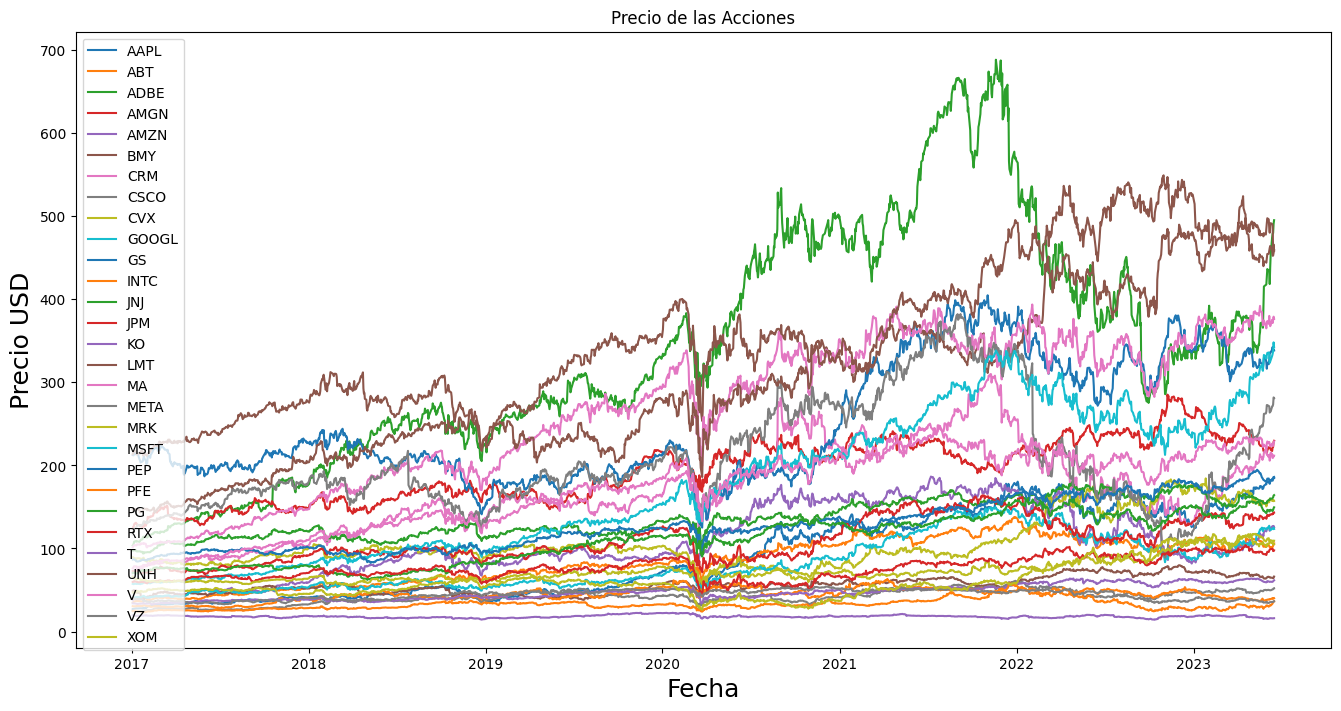

In [6]:
plt.figure(figsize=(16.2, 8))
for i in dataSet.columns.values:
    plt.plot(dataSet[i], label=i)
plt.title('Precio de las Acciones')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Precio USD', fontsize=18)
plt.legend(dataSet.columns.values, loc='upper left')
plt.savefig('plotprecios.png', dpi=200, bbox_inches='tight')
plt.show()


### Calculamos el rendimiento de cada acción con el periodo anterior

In [7]:
''' Divide el valor de cada columna (df) por la columna anterior (df.shift(1))
    Luego le resta -1 para obtener el rendimiento.'''
rendimiento = (dataSet / dataSet.shift(1) -1).dropna()
rendimiento.head() * 100

,AAPL,ABT,ADBE,AMGN,AMZN,BMY,CRM,CSCO,CVX,GOOGL,...,MSFT,PEP,PFE,PG,RTX,T,UNH,V,VZ,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,-0.111896,0.793861,0.637801,1.419747,0.465728,0.135453,3.203859,-0.594456,-0.025452,-0.029705,...,-0.447424,0.191103,0.878796,0.356319,0.063186,-0.581147,0.284910,0.817646,-0.109917,-1.100235
2017-01-05,0.508508,0.863792,1.699639,0.071938,3.073240,1.673986,-0.013739,0.232558,-0.432858,0.649939,...,0.000000,-0.133517,0.961252,0.662691,0.405754,-0.280563,0.166731,1.172784,0.220086,-1.490704
2017-01-06,1.114835,2.720428,2.256632,2.483986,1.991160,-0.299348,1.387556,0.198849,-0.400636,1.499350,...,0.866781,-0.143245,-0.386796,-0.035256,1.077715,-1.621948,0.141860,1.381174,-1.483482,-0.056457
2017-01-09,0.915951,-0.098111,0.249304,1.313950,0.116839,-0.366972,0.216797,-0.165373,-0.855882,0.238725,...,-0.318283,-1.052016,-0.029851,-0.740896,-0.932937,-1.258466,-0.283247,-0.559545,-1.088981,-1.649742
2017-01-10,0.100849,1.350038,-0.285528,-0.050338,-0.127999,0.418540,0.027047,0.662666,-0.759669,-0.141450,...,-0.031929,-1.440183,-0.089658,-1.078245,-0.215242,0.024518,-0.228471,-0.538240,0.151857,-1.275255


### Calculo de esperanza, varianza y desvío estandar

In [8]:
esp_var_desv = pd.DataFrame(rendimiento.mean() *100, columns=["Esperanza"])

esp_var_desv = esp_var_desv.T
esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.var(ddof=0), columns=["Varianza"]).T)
esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.std(ddof=0)*100, columns=["STD"]).T)
esp_var_desv

<ipython-input-8-92ca6a712313>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.var(ddof=0), columns=["Varianza"]).T)
<ipython-input-8-92ca6a712313>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.std(ddof=0)*100, columns=["STD"]).T)


,AAPL,ABT,ADBE,AMGN,AMZN,BMY,CRM,CSCO,CVX,GOOGL,...,MSFT,PEP,PFE,PG,RTX,T,UNH,V,VZ,XOM
Esperanza,0.137189,0.080979,0.121423,0.049553,0.096957,0.029806,0.093364,0.059852,0.055935,0.086309,...,0.126677,0.055103,0.041535,0.054447,0.048122,-0.000210,0.085279,0.082034,0.001645,0.047512
Varianza,0.000377,0.000246,0.000497,0.000235,0.000458,0.000221,0.000517,0.000289,0.000419,0.000349,...,0.000333,0.000162,0.000232,0.000161,0.000356,0.000240,0.000301,0.000284,0.000151,0.000381
STD,1.941773,1.567734,2.230056,1.532453,2.139230,1.487416,2.273234,1.700425,2.046507,1.868009,...,1.823812,1.274444,1.521660,1.267662,1.886017,1.548041,1.734447,1.686160,1.228023,1.952079


### Distribución de rendimientos

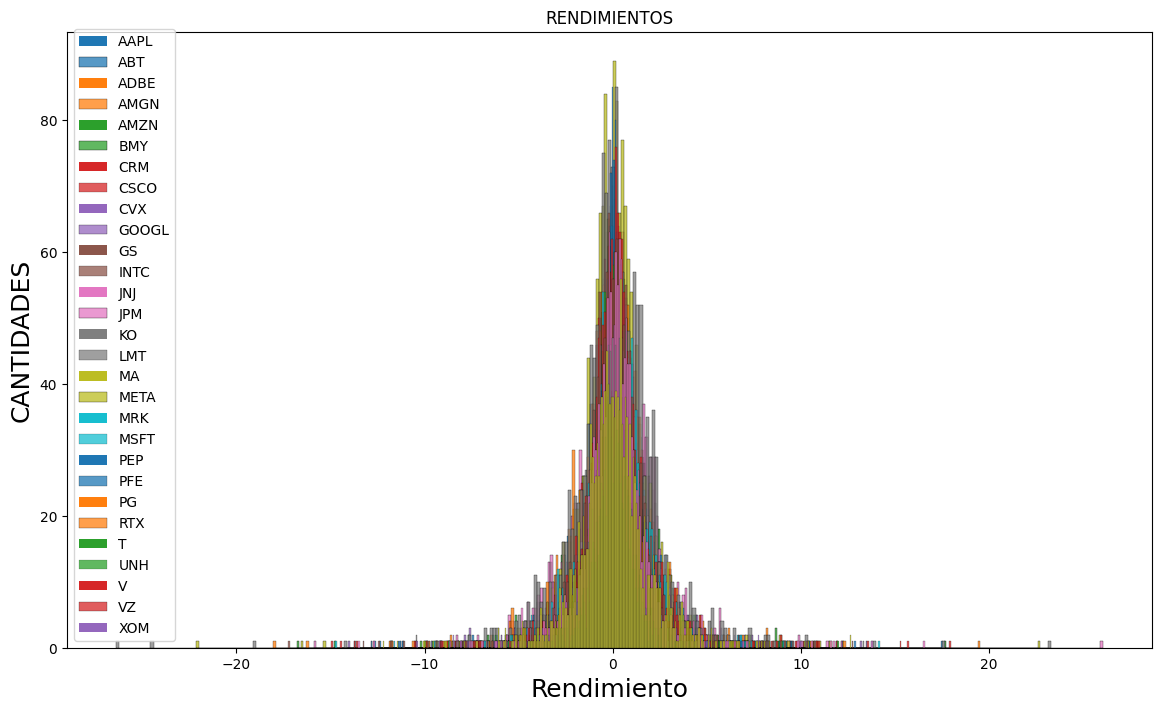

In [9]:
plt.figure(figsize=(14, 8))
for i in rendimiento.columns.values:
    #plt.hist(rendimiento[i]*100, label = i, bins=300)
    sns.histplot(rendimiento[i]*100, label=i, bins=300)
plt.title('RENDIMIENTOS')
plt.xlabel('Rendimiento', fontsize=18)
plt.ylabel('CANTIDADES', fontsize=18)
plt.legend(rendimiento.columns.values, loc='upper left')
plt.legend(rendimiento.columns.values)
#eliminamos los extremos con menos cantidad de datos.
#plt.xlim(-20,20)
plt.show()

### Matriz de covarianzas.
Valor que refleja en cómo varían dos variables de forma conjunta respecto a sus medias.

In [10]:
mCovarianza = rendimiento.cov(ddof=0, numeric_only=False)
cm = sns.light_palette("green", as_cmap=True)
mCovarianza.style.background_gradient(cmap=cm)

,AAPL,ABT,ADBE,AMGN,AMZN,BMY,CRM,CSCO,CVX,GOOGL,GS,INTC,JNJ,JPM,KO,LMT,MA,META,MRK,MSFT,PEP,PFE,PG,RTX,T,UNH,V,VZ,XOM
AAPL,0.000377,0.000160,0.000284,0.000127,0.000263,0.000095,0.000257,0.000192,0.000143,0.000246,0.000192,0.000247,0.000092,0.000165,0.000096,0.000106,0.000232,0.000287,0.000084,0.000264,0.000119,0.000097,0.000100,0.000151,0.000099,0.000156,0.000204,0.000062,0.000126
ABT,0.000160,0.000246,0.000181,0.000126,0.000143,0.000095,0.000168,0.000144,0.000105,0.000150,0.000129,0.000166,0.000108,0.000126,0.000092,0.000094,0.000161,0.000155,0.000103,0.000170,0.000104,0.000110,0.000099,0.000113,0.000092,0.000144,0.000146,0.000074,0.000081
ADBE,0.000284,0.000181,0.000497,0.000130,0.000308,0.000085,0.000369,0.000203,0.000123,0.000285,0.000179,0.000263,0.000088,0.000150,0.000093,0.000108,0.000257,0.000334,0.000085,0.000318,0.000118,0.000096,0.000094,0.000148,0.000076,0.000153,0.000233,0.000051,0.000100
AMGN,0.000127,0.000126,0.000130,0.000235,0.000099,0.000106,0.000110,0.000123,0.000100,0.000109,0.000111,0.000139,0.000103,0.000110,0.000078,0.000088,0.000116,0.000110,0.000109,0.000126,0.000099,0.000111,0.000089,0.000095,0.000089,0.000129,0.000111,0.000069,0.000084
AMZN,0.000263,0.000143,0.000308,0.000099,0.000458,0.000064,0.000295,0.000163,0.000091,0.000270,0.000158,0.000218,0.000065,0.000121,0.000062,0.000071,0.000208,0.000335,0.000050,0.000275,0.000082,0.000072,0.000066,0.000102,0.000069,0.000115,0.000175,0.000044,0.000083
BMY,0.000095,0.000095,0.000085,0.000106,0.000064,0.000221,0.000083,0.000095,0.000102,0.000081,0.000090,0.000099,0.000086,0.000093,0.000065,0.000083,0.000099,0.000082,0.000095,0.000087,0.000074,0.000102,0.000064,0.000102,0.000072,0.000105,0.000092,0.000051,0.000082
CRM,0.000257,0.000168,0.000369,0.000110,0.000295,0.000083,0.000517,0.000186,0.000137,0.000260,0.000186,0.000234,0.000075,0.000157,0.000086,0.000101,0.000256,0.000319,0.000083,0.000287,0.000103,0.000081,0.000080,0.000154,0.000093,0.000141,0.000225,0.000056,0.000112
CSCO,0.000192,0.000144,0.000203,0.000123,0.000163,0.000095,0.000186,0.000289,0.000150,0.000174,0.000175,0.000213,0.000104,0.000167,0.000096,0.000110,0.000190,0.000177,0.000093,0.000192,0.000111,0.000112,0.000103,0.000152,0.000114,0.000137,0.000169,0.000078,0.000135
CVX,0.000143,0.000105,0.000123,0.000100,0.000091,0.000102,0.000137,0.000150,0.000419,0.000143,0.000236,0.000177,0.000092,0.000241,0.000111,0.000132,0.000194,0.000133,0.000104,0.000141,0.000093,0.000098,0.000068,0.000238,0.000132,0.000166,0.000178,0.000080,0.000337
GOOGL,0.000246,0.000150,0.000285,0.000109,0.000270,0.000081,0.000260,0.000174,0.000143,0.000349,0.000183,0.000228,0.000083,0.000159,0.000088,0.000088,0.000222,0.000323,0.000075,0.000267,0.000098,0.000090,0.000083,0.000149,0.000088,0.000143,0.000197,0.000059,0.000124


### Carga de pruebas de WEIGHT, Rendimiento y riesgo del portafolio

#### Se definen 3 arrays
- PesosPortafolio = pesos randoms con cantidad de elementos igual al numero de activos.
- rportafolio = Rendimiento del portafolio
- sdPortafolio = desvio standard, o riesgo del portafolio

In [11]:
pesosPortafolio = []
rPortafolio = []
sdPortafolio = []

#guardamos la cantidad de activos que tenemos para el análisis.
nrosActivos = len(rendimiento.columns)
nrosActivos

29

In [12]:
for x in range(50000):
    pesos = np.random.random(len(rendimiento.columns)) # Arreglo de 1 x la cantidad de activos
    # Dividir por la suma total de los números
    pesos /= np.sum(pesos)
    # Agrega cada prueba a la matriz
    pesosPortafolio.append(pesos)

    # Retorno la "sumaProducto" o el producto de la matriz
    # con los porcentajes de inversion X el rendimiento de cada activo
    rPortafolio.append(np.dot(rendimiento.mean(), pesos)) # rendimiento.mean() = matriz de 7X1

    # np.dot(mCovarianzas, pesos)  retorna matriz 1X7 de multiplicar los
    # pesos(porcentaje a invertir) y la matriz de covarianzas
    # A esa matriz de 1X7 de varianzas, la vuelvo a multiplicar por pesos.T
    # eso nos devuelve un solo resultado, la varianza de la inversion y
    # posteriormente el STD
    sdPortafolio.append(np.sqrt(
        np.dot(pesos.T, np.dot(mCovarianza, pesos))
    ))

#### Ejemplo
Para la primera distribución de la inversión en % en los 7 activos:

In [13]:
for i in range(len(pesosPortafolio[0])):
    print(rendimiento.columns[i],' -> ', round(pesosPortafolio[0][i]*100,2), '%')

AAPL  ->  4.85 %
ABT  ->  0.73 %
ADBE  ->  0.1 %
AMGN  ->  4.29 %
AMZN  ->  4.37 %
BMY  ->  6.35 %
CRM  ->  5.78 %
CSCO  ->  6.06 %
CVX  ->  6.27 %
GOOGL  ->  5.65 %
GS  ->  1.12 %
INTC  ->  2.44 %
JNJ  ->  4.61 %
JPM  ->  5.48 %
KO  ->  0.66 %
LMT  ->  3.47 %
MA  ->  1.86 %
META  ->  0.63 %
MRK  ->  3.79 %
MSFT  ->  3.86 %
PEP  ->  2.68 %
PFE  ->  0.29 %
PG  ->  1.23 %
RTX  ->  4.02 %
T  ->  5.32 %
UNH  ->  4.09 %
V  ->  5.72 %
VZ  ->  2.11 %
XOM  ->  2.17 %


Va a tener el siguiente rendimiento:

In [14]:
str(round(rPortafolio[0], 5)*100) + ' %'

'0.065 %'

Tiene el siguiente riesgo (%):

In [15]:
str(round(sdPortafolio[0], 3)*100) + ' %'

'1.2 %'

###Generación de diccionarios
A partir de estas 3 variables, vamos a buscar minimizar el riesgo y maximizar el retorno
Generamos un diccionario de listas -> lista de rendimiento, riesgo y una lista para cada acción con sus porcentajes de inversión

In [16]:
diccionario = {'Rendimiento': rPortafolio, 'Riesgo': sdPortafolio}
for i, accion in enumerate(rendimiento.columns.tolist()):
    diccionario['USD ' + accion] = [w[i] for w in pesosPortafolio]

Generamos un DataFrame a partir del diccionario para tener las inversiones, riesgo y rendimiento en una sola linea

In [17]:
matrizPortafolio = pd.DataFrame(diccionario)
matrizPortafolio

,Rendimiento,Riesgo,USD AAPL,USD ABT,USD ADBE,USD AMGN,USD AMZN,USD BMY,USD CRM,USD CSCO,...,USD MSFT,USD PEP,USD PFE,USD PG,USD RTX,USD T,USD UNH,USD V,USD VZ,USD XOM
0,0.000649,0.011915,0.048488,0.007271,0.001022,0.042873,0.043688,0.063539,0.057764,0.060597,...,0.038599,0.026792,0.002898,0.012336,0.040243,0.053243,0.040865,0.057218,0.021112,0.021688
1,0.000671,0.011972,0.004137,0.052092,0.035422,0.061136,0.069779,0.012050,0.055850,0.024111,...,0.043468,0.061401,0.033873,0.017075,0.052798,0.021715,0.003375,0.006175,0.011309,0.023932
2,0.000640,0.011911,0.000612,0.045185,0.034251,0.055931,0.043512,0.017532,0.032402,0.030290,...,0.046896,0.043836,0.019406,0.011052,0.013255,0.051082,0.045858,0.037759,0.052847,0.020862
3,0.000587,0.011724,0.001590,0.006041,0.070844,0.004973,0.035216,0.071959,0.001266,0.009910,...,0.020562,0.040765,0.035830,0.010002,0.050822,0.051854,0.026483,0.065661,0.054677,0.017671
4,0.000706,0.012314,0.045065,0.017474,0.063087,0.050618,0.041671,0.010233,0.055001,0.031538,...,0.053510,0.052202,0.006464,0.012082,0.035372,0.026062,0.006620,0.034594,0.058247,0.019683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000657,0.011790,0.022039,0.022961,0.054357,0.044250,0.037576,0.016367,0.054787,0.049386,...,0.032014,0.049809,0.010826,0.054743,0.021772,0.044770,0.007913,0.027127,0.033144,0.054786
49996,0.000654,0.012119,0.037031,0.042524,0.056215,0.012124,0.010130,0.003524,0.054401,0.059580,...,0.016364,0.032014,0.016084,0.060187,0.000477,0.068501,0.007128,0.037143,0.034526,0.018933
49997,0.000589,0.011382,0.008947,0.081074,0.007919,0.055069,0.035627,0.029657,0.060888,0.014428,...,0.013330,0.007978,0.039664,0.054504,0.019930,0.055505,0.064906,0.012668,0.037318,0.074805
49998,0.000579,0.011625,0.041964,0.035797,0.000564,0.016946,0.024217,0.033656,0.010027,0.075322,...,0.042052,0.006754,0.044699,0.014695,0.064115,0.068461,0.022834,0.042851,0.065707,0.014669


## Frontera Eficiente
A continuación tenemos todas las carteras posibles con sus Riesgos y Rendimientos.

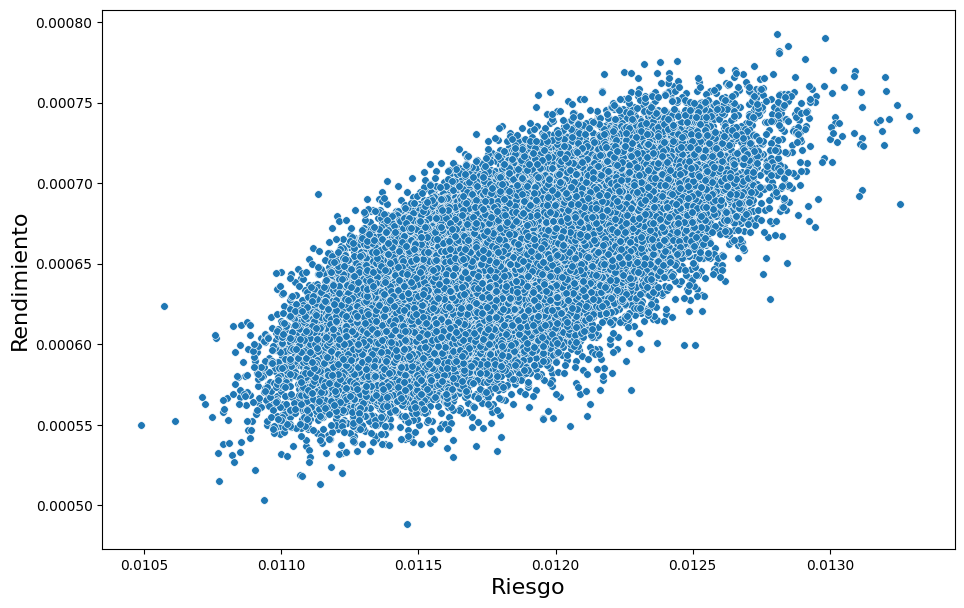

In [18]:
plt.figure(figsize=(11,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.xlabel('Riesgo', fontsize=16)
plt.ylabel('Rendimiento', fontsize=16)
plt.show()

# ANÁLISIS

### Mínima Varianza
Buscamos el menor riesgo. Las carteras eficientes en las cuales deberíamos invertir, debe tener riesgo mayor a la mínima varianza, pero siempre mayor rendimiento.
En el siguiente gráfico están ubicadas por encima de la línea punteada.

In [19]:
minimaVarianza = matrizPortafolio.iloc[matrizPortafolio['Riesgo'].idxmin()]
display(minimaVarianza)
display(minimaVarianza.loc["Rendimiento"]*100)

Rendimiento    0.000550
Riesgo         0.010489
USD AAPL       0.014470
USD ABT        0.058023
USD ADBE       0.000070
USD AMGN       0.066437
USD AMZN       0.003426
USD BMY        0.078826
USD CRM        0.000908
USD CSCO       0.001266
USD CVX        0.023059
USD GOOGL      0.010396
USD GS         0.008784
USD INTC       0.029441
USD JNJ        0.000366
USD JPM        0.030922
USD KO         0.060133
USD LMT        0.088005
USD MA         0.003686
USD META       0.038321
USD MRK        0.057677
USD MSFT       0.056129
USD PEP        0.067128
USD PFE        0.068943
USD PG         0.062944
USD RTX        0.008927
USD T          0.048836
USD UNH        0.031840
USD V          0.012344
USD VZ         0.066501
USD XOM        0.002191
Name: 18017, dtype: float64

0.054970969426065094

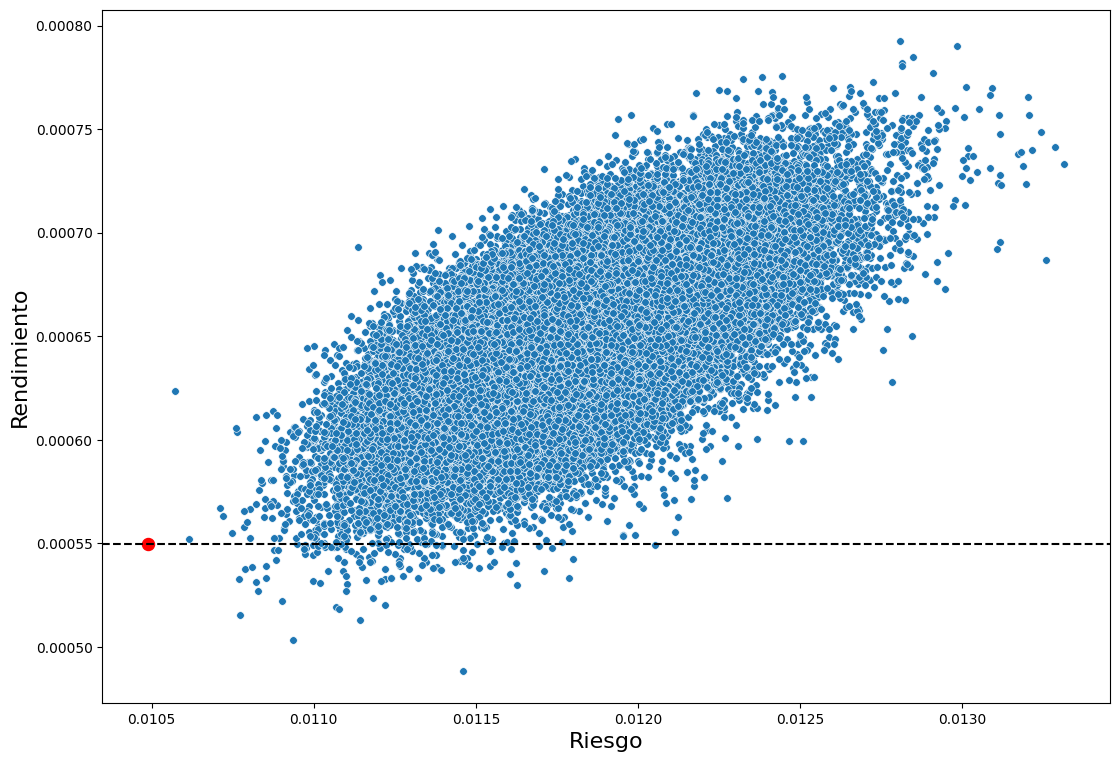

In [20]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.xlabel('Riesgo', fontsize=16)
plt.ylabel('Rendimiento', fontsize=16)
plt.show()

### Mayor rendimiento
Buscamos la inversión con mayor rendimiento de las pruebas.
A partir de este punto, todos los que se encuetran a la derecha de la línea punteada, serán irrelevantes porque tienene menor rendimiento y mayor riesgo.


In [21]:
mayorRendimiento = matrizPortafolio.loc[matrizPortafolio['Rendimiento'].idxmax()]
mayorRendimiento

Rendimiento    0.000792
Riesgo         0.012808
USD AAPL       0.052829
USD ABT        0.053604
USD ADBE       0.070915
USD AMGN       0.016880
USD AMZN       0.060441
USD BMY        0.015647
USD CRM        0.064036
USD CSCO       0.007114
USD CVX        0.006892
USD GOOGL      0.011345
USD GS         0.000079
USD INTC       0.023239
USD JNJ        0.021733
USD JPM        0.050852
USD KO         0.003162
USD LMT        0.045058
USD MA         0.084489
USD META       0.015218
USD MRK        0.003792
USD MSFT       0.081309
USD PEP        0.021116
USD PFE        0.005058
USD PG         0.066849
USD RTX        0.005527
USD T          0.058298
USD UNH        0.058676
USD V          0.066155
USD VZ         0.016094
USD XOM        0.013593
Name: 11240, dtype: float64

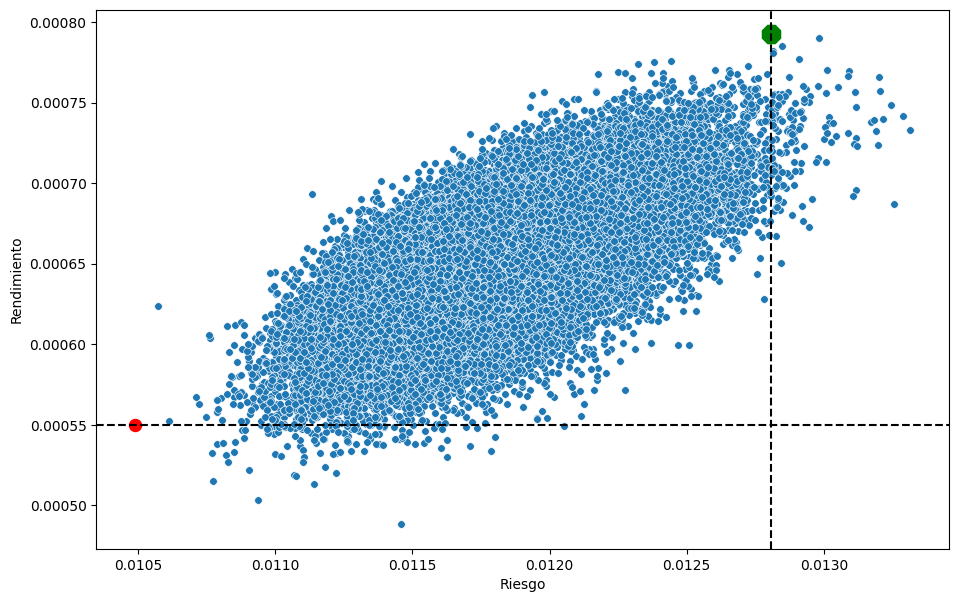

In [22]:
'''matrizPortafolio.plot(x='Riesgo',y='Rendimiento', kind='scatter', figsize=(13,9) )
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='*', s=300)
plt.scatter(x=optimo[1], y=optimo[0], color='green', marker='*', s=300)
plt.savefig('FronteraEficiente', dpi=200)'''


plt.figure(figsize=(11,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='8', s=200)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Cuadrante óptimo
Selección de los portafolios óptimos cuadrante superior izquierdo

In [23]:
m = matrizPortafolio
m = m[(m["Rendimiento"] >= minimaVarianza[0]) & (m["Riesgo"] <= mayorRendimiento[1])]

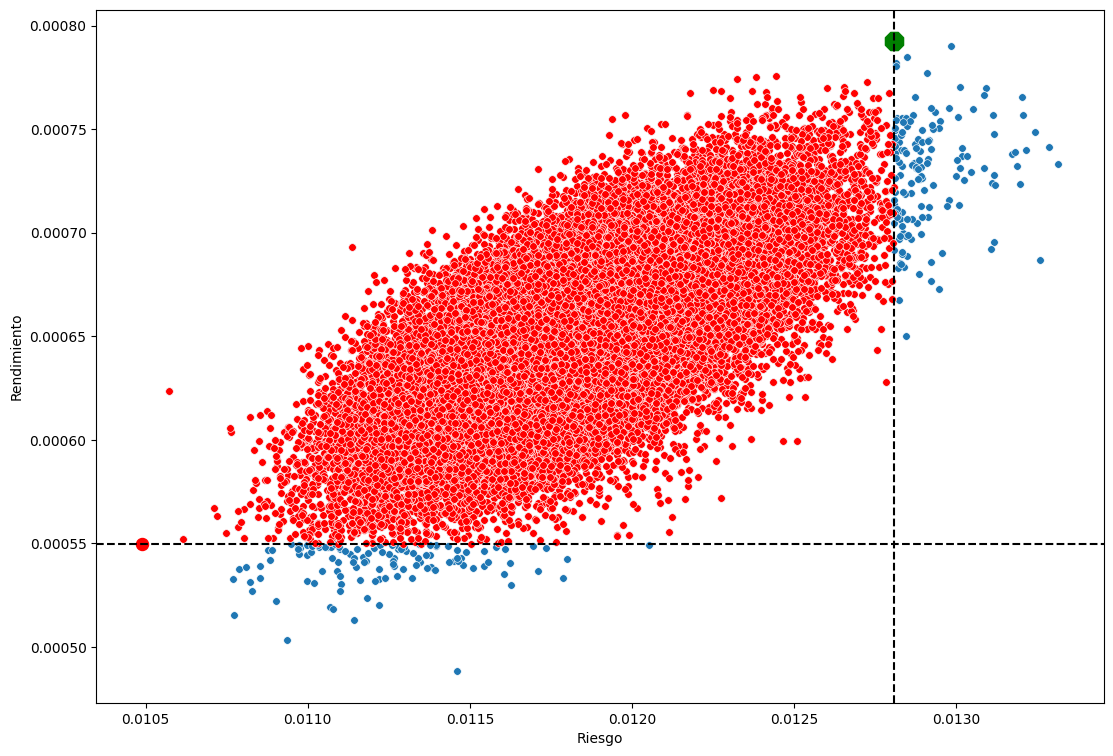

In [24]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data=m, x = 'Riesgo', y='Rendimiento', color="red", s=30)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='8', s=200)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Pendiente óptima

In [25]:
# Encontrar la pendiente de la línea recta que cruza los dos puntos.
x1, y1 = minimaVarianza['Riesgo'], minimaVarianza['Rendimiento']
x2, y2 = mayorRendimiento['Riesgo'], mayorRendimiento['Rendimiento']
pendiente = (y2 - y1) / (x2 - x1)
print("Pendiente: ", pendiente)
b = y1 - pendiente * x1
print("Punto de corte", b)


Pendiente:  0.10468652643619902
Punto de corte -0.0005483454383444356


In [26]:
x_vals, y_vals = [], []
for index, row in m.iterrows():
    x = row['Riesgo']
    y = row['Rendimiento']
    if y >= pendiente * x + b:
        x_vals.append(x)
        y_vals.append(y)
pendiente_optima = pd.DataFrame({'Riesgo': x_vals, 'Rendimiento': y_vals})

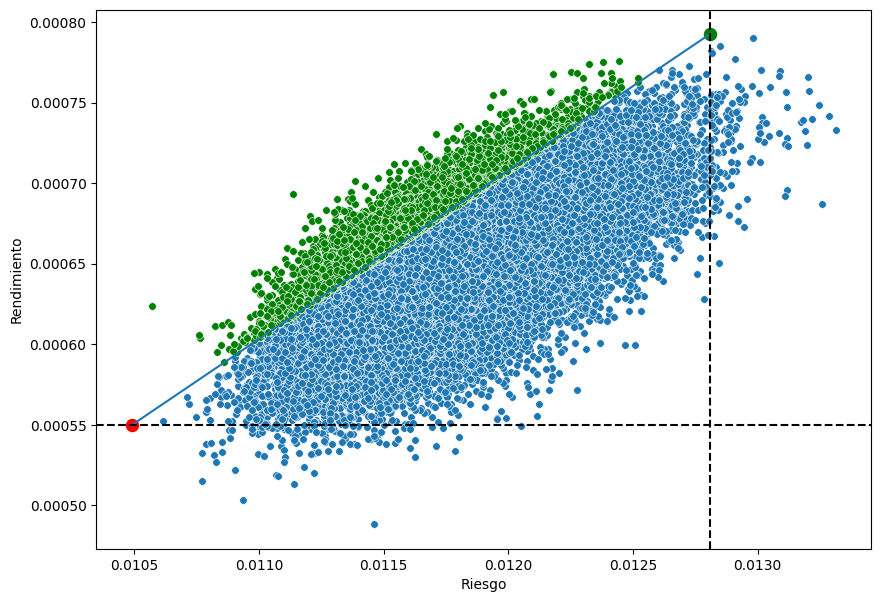

In [27]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data=pendiente_optima, x = 'Riesgo', y='Rendimiento', color="green", s=30)


# Puntos de menor riesgo(rojo) y mayor retorno(Verde)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='.', s=300)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)

plt.plot([mayorRendimiento[1], minimaVarianza[1]], [mayorRendimiento[0], minimaVarianza[0]])


plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Definición de carteras según perfil de riesgo del inversor

 Borramos las carteras que no vamos a tomar

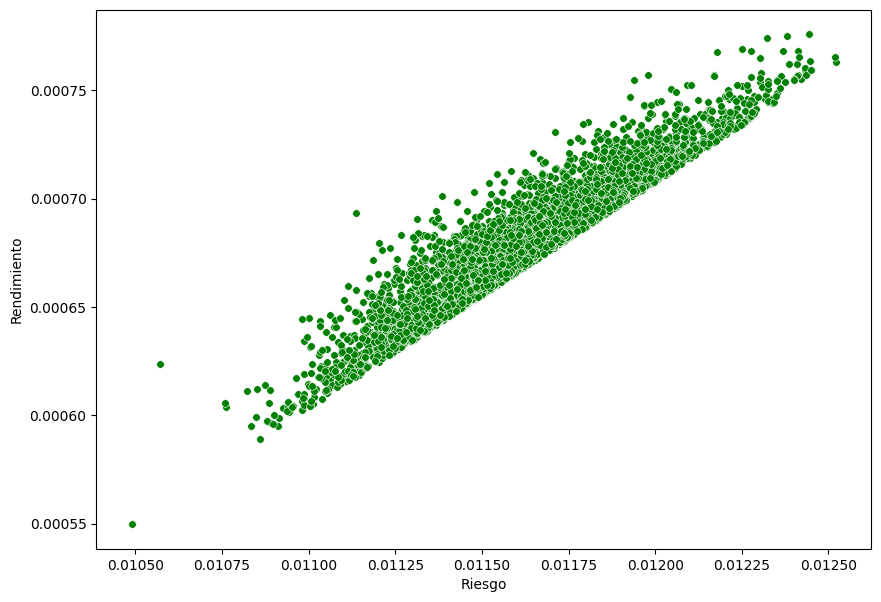

In [28]:
plt.figure(figsize=(10,7))
sns.scatterplot(data= pendiente_optima, x = 'Riesgo', y='Rendimiento',color='green', s=30)

#plt.plot([mayorRendimiento[1], minimaVarianza[1]], [mayorRendimiento[0], minimaVarianza[0]])
#plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
#plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

#### Definir los 3 perfiles
Dividir en 3 sectores del gráfico según perfil del riesgo

In [29]:
division = (pendiente_optima['Riesgo'].max()  - pendiente_optima['Riesgo'].min()) / 3
division
bajo = pendiente_optima['Riesgo'].min() + division
medio = bajo + division

In [30]:
# Perfil Bajo
perfil_bajo = pendiente_optima[(pendiente_optima["Riesgo"] >= pendiente_optima["Riesgo"].min()) &
                 (pendiente_optima["Riesgo"] <= bajo)]
maximo_perfil_bajo = perfil_bajo.loc[perfil_bajo['Rendimiento'].idxmax()]
print(f"Máximo rendimiento para perfil bajo: \n {maximo_perfil_bajo} \n ---------------")

# Perfil Medio
perfil_medio = pendiente_optima[(pendiente_optima["Riesgo"] >= bajo) &
                 (pendiente_optima["Riesgo"] <= medio)]
maximo_perfil_medio = perfil_medio.loc[perfil_medio['Rendimiento'].idxmax()]
print(f"Máximo rendimiento para perfil Medio: \n {maximo_perfil_medio} \n ---------------")

# Perfil Alto
perfil_alto = pendiente_optima[pendiente_optima["Riesgo"] >= medio]
maximo_perfil_alto = perfil_alto.loc[perfil_alto['Rendimiento'].idxmax()]
print(f"Máximo rendimiento para perfil Medio: \n {maximo_perfil_alto} \n ---------------")

Máximo rendimiento para perfil bajo: 
 Riesgo         0.011136
Rendimiento    0.000693
Name: 4126, dtype: float64 
 ---------------
Máximo rendimiento para perfil Medio: 
 Riesgo         0.011805
Rendimiento    0.000735
Name: 817, dtype: float64 
 ---------------
Máximo rendimiento para perfil Medio: 
 Riesgo         0.012444
Rendimiento    0.000776
Name: 2547, dtype: float64 
 ---------------


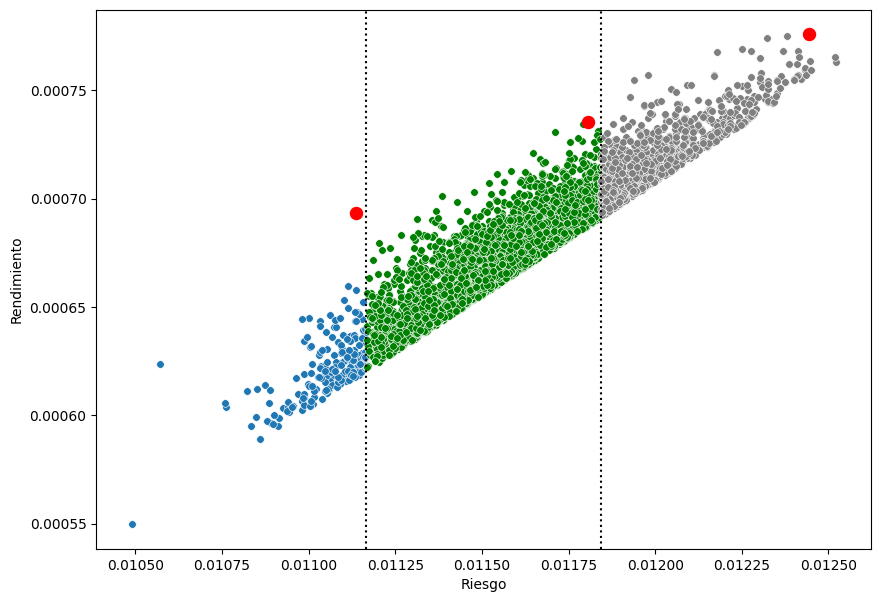

In [31]:
plt.figure(figsize=(10,7))

sns.scatterplot(data= perfil_bajo, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data= perfil_medio, x = 'Riesgo', y='Rendimiento', color='green', s=30)
sns.scatterplot(data= perfil_alto, x = 'Riesgo', y='Rendimiento', color='grey', s=30)

# Lineas verticales
plt.axvline(x=bajo, color='black', linestyle=':')
plt.axvline(x=medio, color='black', linestyle=':')

# Puntos máximos por perfil
plt.scatter(x=maximo_perfil_bajo[0], y=maximo_perfil_bajo[1], color='red', marker='.', s=300)
plt.scatter(x=maximo_perfil_medio[0], y=maximo_perfil_medio[1], color='red', marker='.', s=300)
plt.scatter(x=maximo_perfil_alto[0], y=maximo_perfil_alto[1], color='red', marker='.', s=300)

plt.show()

# REVISAR DESDE ACÁ
## TAMBIÉN ARRIBA COMO REPRESENTAR LOS VALORES EN %  (*100)

### Portafolio optimo
Para cada Riesgo que estamos dispuestos a correr, tomamos el valor máximo de rendimiento

In [32]:
porfolioOptimo = matrizPortafolio.loc[matrizPortafolio.groupby('Riesgo')['Rendimiento'].idxmax()].reset_index(drop=True)
porfolioOptimo.head()

,Rendimiento,Riesgo,USD AAPL,USD ABT,USD ADBE,USD AMGN,USD AMZN,USD BMY,USD CRM,USD CSCO,...,USD MSFT,USD PEP,USD PFE,USD PG,USD RTX,USD T,USD UNH,USD V,USD VZ,USD XOM
0,0.000550,0.010489,0.014470,0.058023,0.000070,0.066437,0.003426,0.078826,0.000908,0.001266,...,0.056129,0.067128,0.068943,0.062944,0.008927,0.048836,0.031840,0.012344,0.066501,0.002191
1,0.000624,0.010572,0.074662,0.035113,0.002219,0.025482,0.051636,0.059660,0.039556,0.019598,...,0.012479,0.043675,0.029266,0.084881,0.014254,0.016700,0.032654,0.006819,0.086757,0.013869
2,0.000552,0.010614,0.046644,0.000553,0.021331,0.074905,0.009281,0.044546,0.007555,0.078487,...,0.003884,0.038669,0.051823,0.082401,0.012737,0.071924,0.028830,0.042575,0.054119,0.029087
3,0.000567,0.010712,0.018103,0.042742,0.035311,0.065287,0.004235,0.058614,0.035951,0.055463,...,0.006637,0.071845,0.073240,0.069813,0.008616,0.007474,0.007280,0.032414,0.044056,0.074212
4,0.000563,0.010721,0.016985,0.017919,0.001472,0.059635,0.039242,0.063624,0.052861,0.057682,...,0.001998,0.026717,0.062602,0.061385,0.016974,0.040305,0.034807,0.032627,0.063010,0.003835


# Pruebas

###Segmentar en 3 bloques de riesgos:
    - bajo
    - medio
    - alto


In [33]:
# Crea nuevo DataFrame para almacenar los valores seleccionados
portafolioReducido = pd.DataFrame(columns=matrizPortafolio.columns)
# n es el rango que toma para tomar el máximo rendimiento
n = 30
for i in range(0, len(matrizPortafolio), n):
    # Toma las n filas correspondientes
    df_temp = matrizPortafolio.iloc[i:i+n]
    # selecciona el máximo rendimiento de esas n filas
    df_max = df_temp.loc[df_temp["Rendimiento"].idxmax()]
    # Agrega el registro en un nuevo dataframe
    portafolioReducido = portafolioReducido.append(df_max, ignore_index=True)





<ipython-input-33-7d57fb754a29>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portafolioReducido = portafolioReducido.append(df_max, ignore_index=True)


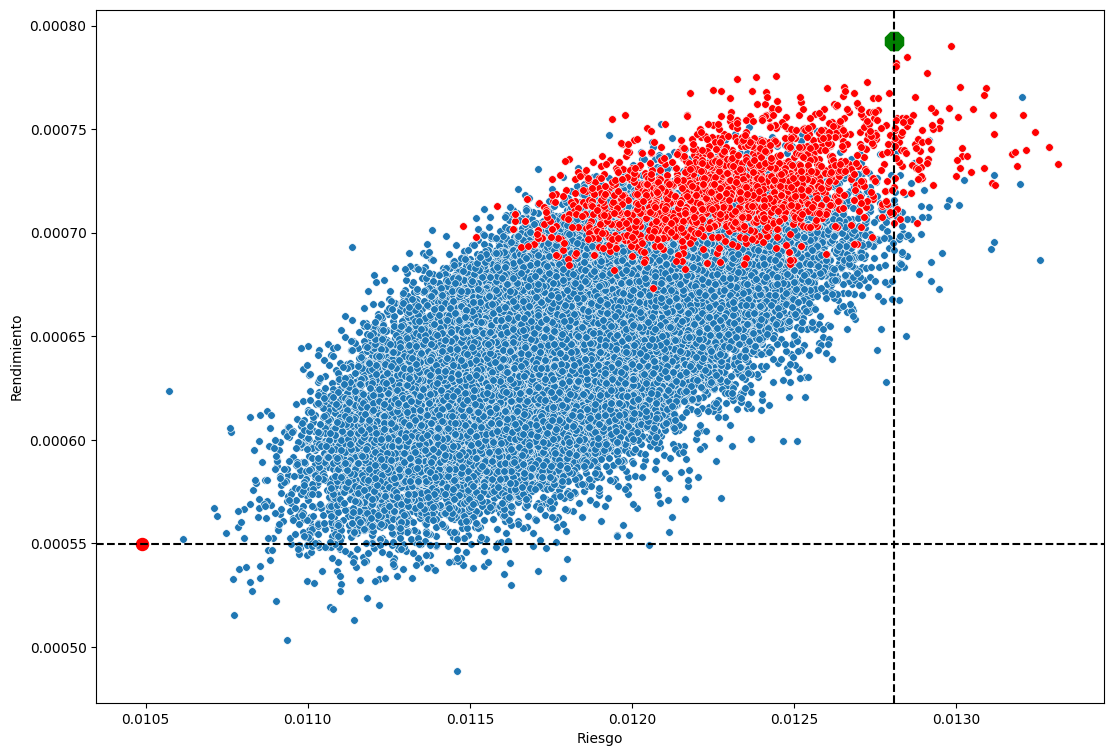

In [34]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data=portafolioReducido, x = 'Riesgo', y='Rendimiento', color="red", s=30)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='8', s=200)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Extraigo la pendiente de la recta que corta los puntos de mínimo riesgo y máximo retorno
b = y1 - m * x1

In [35]:
matrizPortafolio

,Rendimiento,Riesgo,USD AAPL,USD ABT,USD ADBE,USD AMGN,USD AMZN,USD BMY,USD CRM,USD CSCO,...,USD MSFT,USD PEP,USD PFE,USD PG,USD RTX,USD T,USD UNH,USD V,USD VZ,USD XOM
0,0.000649,0.011915,0.048488,0.007271,0.001022,0.042873,0.043688,0.063539,0.057764,0.060597,...,0.038599,0.026792,0.002898,0.012336,0.040243,0.053243,0.040865,0.057218,0.021112,0.021688
1,0.000671,0.011972,0.004137,0.052092,0.035422,0.061136,0.069779,0.012050,0.055850,0.024111,...,0.043468,0.061401,0.033873,0.017075,0.052798,0.021715,0.003375,0.006175,0.011309,0.023932
2,0.000640,0.011911,0.000612,0.045185,0.034251,0.055931,0.043512,0.017532,0.032402,0.030290,...,0.046896,0.043836,0.019406,0.011052,0.013255,0.051082,0.045858,0.037759,0.052847,0.020862
3,0.000587,0.011724,0.001590,0.006041,0.070844,0.004973,0.035216,0.071959,0.001266,0.009910,...,0.020562,0.040765,0.035830,0.010002,0.050822,0.051854,0.026483,0.065661,0.054677,0.017671
4,0.000706,0.012314,0.045065,0.017474,0.063087,0.050618,0.041671,0.010233,0.055001,0.031538,...,0.053510,0.052202,0.006464,0.012082,0.035372,0.026062,0.006620,0.034594,0.058247,0.019683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000657,0.011790,0.022039,0.022961,0.054357,0.044250,0.037576,0.016367,0.054787,0.049386,...,0.032014,0.049809,0.010826,0.054743,0.021772,0.044770,0.007913,0.027127,0.033144,0.054786
49996,0.000654,0.012119,0.037031,0.042524,0.056215,0.012124,0.010130,0.003524,0.054401,0.059580,...,0.016364,0.032014,0.016084,0.060187,0.000477,0.068501,0.007128,0.037143,0.034526,0.018933
49997,0.000589,0.011382,0.008947,0.081074,0.007919,0.055069,0.035627,0.029657,0.060888,0.014428,...,0.013330,0.007978,0.039664,0.054504,0.019930,0.055505,0.064906,0.012668,0.037318,0.074805
49998,0.000579,0.011625,0.041964,0.035797,0.000564,0.016946,0.024217,0.033656,0.010027,0.075322,...,0.042052,0.006754,0.044699,0.014695,0.064115,0.068461,0.022834,0.042851,0.065707,0.014669


In [36]:
matrizPortafolio[matrizPortafolio['Rendimiento'].between(0.017, 0.0178)]

,Rendimiento,Riesgo,USD AAPL,USD ABT,USD ADBE,USD AMGN,USD AMZN,USD BMY,USD CRM,USD CSCO,...,USD MSFT,USD PEP,USD PFE,USD PG,USD RTX,USD T,USD UNH,USD V,USD VZ,USD XOM
